<a href="https://colab.research.google.com/github/dtabed/covid-19_Biomarkers/blob/main/code/SHAP_and_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#download SHAP
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 29.1 MB/s eta 0:00:00


In [19]:
import pandas as pd 

data = pd.read_csv("covs.csv")
data.columns = data.columns.map(lambda row: "_".join(row.lower().split(" ")))
data

,lmo3,pcsk5,vsig1,bach2,pdgfrb,cr2,rasl11a,rtn2,lgr6,tpt1,...,ldlrad3,alox15b,gltpd2,dcun1d3,tpsb2,ervmer341,mtrnr2l12,ac0058324,tbce,group
0,44,647,21,92,22,5,52,40,17,6272,...,10,30,30,3564,45,47,189,16,575,0
1,8,309,7,216,72,22,4,26,31,5219,...,1,15,22,276,0,23,13,9,493,0
2,15,1374,102,43,73,36,87,77,49,20798,...,75,45,120,952,51,65,214,31,486,0
3,65,1028,40,291,103,34,61,44,20,9581,...,69,22,36,444,95,32,239,0,2740,0
4,2,185,15,42,101,1,10,24,36,7790,...,7,47,27,73,0,25,188,0,27667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,15,0,3,3,0,0,0,1,269,...,0,1,0,400,0,0,0,0,96,1
230,2,45,0,22,0,0,0,0,13,1576,...,6,6,1,657,0,0,0,4,280,1
231,0,20,5,4,15,0,0,15,0,69,...,0,0,0,4,0,0,1,0,12,1
232,25,4070,0,36,3,8,1,0,50,1480,...,1,6,7,56,0,0,81,0,6,1


In [22]:
from patsy import dmatrices

y, X = dmatrices(
    "  group ~ lmo3  + pcsk5  + vsig1  + bach2  + pdgfrb  + cr2  + rasl11a  + rtn2  + lgr6  + tpt1  + tns3  + dusp6  + itgb1bp2  + fam83a  + azgp1  + scgb3a1  + ifi27  + stk32a  + metrnl  + six5  + cd163l1  + pcdhb9  + ldlrad3  + alox15b  + gltpd2  + dcun1d3  + tpsb2  + ervmer341  + mtrnr2l12  + ac0058324  + tbce ",
    data=data,
)

X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [24]:
import xgboost

model = xgboost.XGBClassifier().fit(X_train, y_train)

predict = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)
f1

0.5405405405405405

In [26]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [27]:
#Python Script for Installing the 'XGBoost' inside the cell of Juypter Notebook IDE of Anaconda Distribution
import sys
!{sys.executable} -m pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Printing the Confusion Matrix
cm
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

0.06740447885748324

In [31]:
accuracies.mean()

0.6470760233918128

In [32]:
#CREDIT https://ema.drwhy.ai/LIME.html
from sklearn import preprocessing


In [53]:
!pip install lime
from sklearn import datasets, ensemble, model_selection

from lime.lime_tabular import LimeTabularExplainer 
explainer = LimeTabularExplainer(X, 
                      feature_names=X, 
                      class_names=y, 
                      discretize_continuous=False, 
                      verbose=True)
regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-53-b48e6d842a42>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor()

Intercept 0.41010441218663957
Prediction_local [0.44693748]
Right: 0.44


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
<ipython-input-59-2becede0792a>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


TypeError: ignored

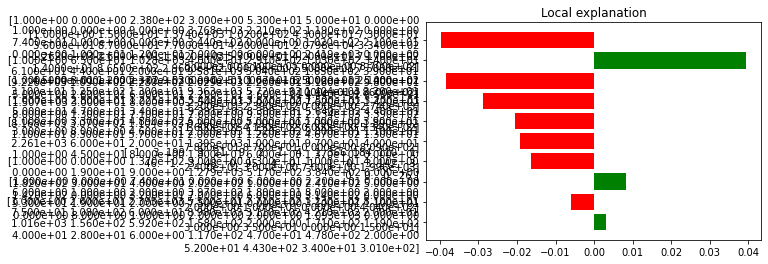

In [59]:
explainer = LimeTabularExplainer(X_train,
    feature_names=X,
    class_names=y,
   discretize_continuous=False, 
                      verbose=True,
    mode='regression')

# Now explain a prediction
exp = explainer.explain_instance(X_test[25], regressor.predict,
        num_features=10)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()
exp.show_in_notebook(show_table=True)

ModuleNotFoundError: ignored